# Interactive graphics

Consider a dataset that has regional volumes for 20 subjects in a long dataset. I wrote some R code for reading in this dataset which you can follow along [here](https://github.com/bcaffo/MRIcloudTutorial/blob/gh-pages/ggplot/ggplot.Rmd). 

In [43]:
import pandas as pd
import plotly.express as px
import numpy as np

In [4]:
dat = pd.read_csv("assetts/kirby21.csv").drop(['Unnamed: 0'], axis = 1)
dat.head()

,id,roi,volume
0,127,Telencephalon_L,531111
1,127,Telencephalon_R,543404
2,127,Diencephalon_L,9683
3,127,Diencephalon_R,9678
4,127,Mesencephalon,10268


Let's vew individual subjects. The id variable is a numeric variable, so let's create a string version.

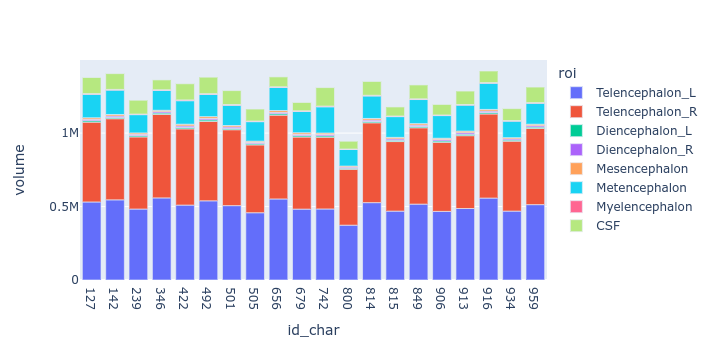

In [37]:
dat = dat.assign(id_char = dat.id.astype(str))
px.bar(dat, x = "id_char", y = "volume", color = "roi").show()

Let's add an intra-cranial volume column by grouping by id, summing all volumes, then merging that data back into the main data. We'll then add a composition variable, which is the regional volumes divided by the intra-cranial volume.

In [55]:
icv = dat.groupby(['id']).volume.sum().reset_index().rename(columns = {'volume' : 'icv'})
dat = pd.merge(dat, icv, on = 'id')
dat = dat.assign(comp = dat.volume / dat.icv)
dat.head()

,id,roi,volume,id_char,icv,comp
0,127,Telencephalon_L,531111,127,1378295,0.385339
1,127,Telencephalon_R,543404,127,1378295,0.394258
2,127,Diencephalon_L,9683,127,1378295,0.007025
3,127,Diencephalon_R,9678,127,1378295,0.007022
4,127,Mesencephalon,10268,127,1378295,0.007450


Let's now replot our compositional data (but now normalized to have height 1).

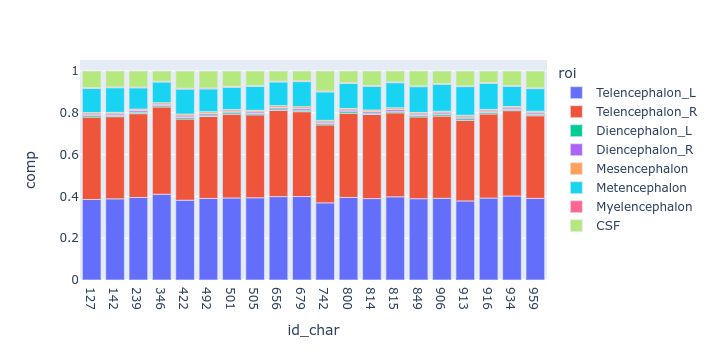

In [56]:
px.bar(dat, x = "id_char", y = "comp", color = "roi").show()

Let's look at the subject level means. Therefore, we have to average across id.

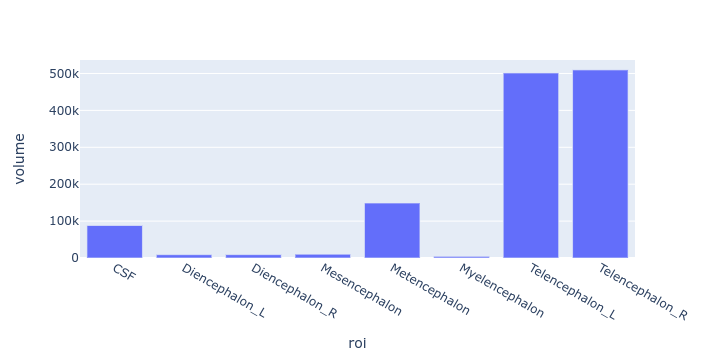

In [26]:
roi_mean = dat.drop(["id", "id_char"], axis = 1).groupby(["roi"]).mean().reset_index()
px.bar(roi_mean, x = "roi", y = "volume").show()